I'll be training a model That classifies tweets into +ve or -ve.
The dataset for training, I chose “Sentiment140”, which originated from Stanford University. More info on the dataset can be found from the link. http://help.sentiment140.com/for-students/
The dataset can be downloaded from the below link.
http://cs.stanford.edu/people/alecmgo/trainingandtestdata.zip

## Data cleaning
Let's look at the data first

In [2]:
from bs4 import BeautifulSoup
import re

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

cols=['sentiment','id','date','query','user','text']
df = pd.read_csv("training.csv" ,header=None,encoding='latin-1',names=cols)
df.sample(10)

,sentiment,id,date,query,user,text
1546722,4,2182552500,Mon Jun 15 13:19:26 PDT 2009,NO_QUERY,fluffyVW,@MartOthman Hehe!!! You finally got you're ste...
846709,4,1564450670,Mon Apr 20 03:33:03 PDT 2009,NO_QUERY,TVFanUK,"@Posh_Totty Considering its monday morning, no..."
1293392,4,2003203618,Tue Jun 02 06:05:12 PDT 2009,NO_QUERY,jayzed77,Track and field today wish me luck
79882,0,1752047704,Sat May 09 20:55:33 PDT 2009,NO_QUERY,jackswilgafee,http://twitpic.com/4wds1 - this chinchilla did...
1323369,4,2014896182,Wed Jun 03 03:02:36 PDT 2009,NO_QUERY,alyssaalmighty,"@emmzalmighty hey im cooler than you bitch, @J..."
342503,0,2015270092,Wed Jun 03 04:11:58 PDT 2009,NO_QUERY,wanfaws,@ahmadzul i agree with you about blocking twit...
1350557,4,2045618468,Fri Jun 05 10:59:30 PDT 2009,NO_QUERY,belcomputer521,Tonight we're going to a Fashion design school...
569754,0,2208081093,Wed Jun 17 08:45:20 PDT 2009,NO_QUERY,LillianJulia,@CMStevens I will give that a whirl! every tim...
1170241,4,1980352385,Sun May 31 06:29:33 PDT 2009,NO_QUERY,coniina,Doing the hoedown!!!
1188318,4,1983310725,Sun May 31 12:54:48 PDT 2009,NO_QUERY,kthugnasty,Victoria's House for Lab


the polarity of the tweet (0 = negative, 4 = positive)'

Let's drop unnecessary columns like id, user, date, query

In [4]:
df.drop(['id','date','query','user'],axis=1,inplace=True)

In [5]:
df[df.sentiment==0].head() #negative tweets

,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [6]:
df[df.sentiment==4].head #positive tweets

<bound method NDFrame.head of          sentiment                                               text
800000           4       I LOVE @Health4UandPets u guys r the best!! 
800001           4  im meeting up with one of my besties tonight! ...
800002           4  @DaRealSunisaKim Thanks for the Twitter add, S...
800003           4  Being sick can be really cheap when it hurts t...
800004           4    @LovesBrooklyn2 he has that effect on everyone 
...            ...                                                ...
1599995          4  Just woke up. Having no school is the best fee...
1599996          4  TheWDB.com - Very cool to hear old Walt interv...
1599997          4  Are you ready for your MoJo Makeover? Ask me f...
1599998          4  Happy 38th Birthday to my boo of alll time!!! ...
1599999          4  happy #charitytuesday @theNSPCC @SparksCharity...

[800000 rows x 2 columns]>

In [7]:
df['sentiment'].value_counts()

4    800000
0    800000
Name: sentiment, dtype: int64

There are 8,00,000 tweets for each category,, so in total there are 16,00,000 tweets

In [8]:
df['pre_clean_len'] = [len(t) for t in df.text]
df

,sentiment,text,pre_clean_len
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",115
1,0,is upset that he can't update his Facebook by ...,111
2,0,@Kenichan I dived many times for the ball. Man...,89
3,0,my whole body feels itchy and like its on fire,47
4,0,"@nationwideclass no, it's not behaving at all....",111
...,...,...,...
1599995,4,Just woke up. Having no school is the best fee...,56
1599996,4,TheWDB.com - Very cool to hear old Walt interv...,78
1599997,4,Are you ready for your MoJo Makeover? Ask me f...,57
1599998,4,Happy 38th Birthday to my boo of alll time!!! ...,65


Let's look at the distribution of overall length of strings in each record

Im gonna plot a box plot...

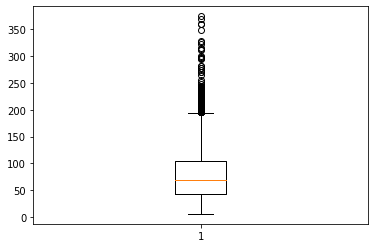

In [9]:
plt.boxplot(df.pre_clean_len)
plt.show()

This seems strange cz the tweet limit is 140 characters, lets dive into this situation

In [10]:
df[df.pre_clean_len > 140].sample(10)

,sentiment,text,pre_clean_len
223805,0,i pressed something..now i can`t use d AT symb...,145
1068013,4,&quot;No one knows me better than I know mysel...,152
962715,4,'Time Is An Illusion and All Time Is Now'... &...,147
898562,4,@Jerzy You could pick out characters you both ...,141
1260974,4,Trying to adjust to everyone knowing what Nata...,148
1489287,4,@gfalcone601 Just a silly question... have yo...,143
355049,0,I'm really tired...the &quot;not sick&quot; ca...,148
1251223,4,@nikiblack no thanks. Editing something I wro...,142
1030271,4,@fauxparse Just discovered that Firefox doesn'...,151
1010637,4,@caffeinebomb good lunch although they gavre ...,141


### Looks like it's cleaning time 👀

- HTML decoding (&amp, &quot..)
- negation handling
- '@' twitter id removing
- URL links( http pattern, www pattern)
- Utf Byte Order Mark (\xef\xbf\xbd)
- Hashtag symbol
- lowercase

In [22]:
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()

pattern1= r'@[A-za-z0-9_]+'
pattern2= r'https?://[^ ]+'
pattern3 = r'www.[^ ]+'
combined =  r'|'.join((pattern1, pattern2))
negations_dic = {"isn't":"is not", "aren't":"are not", "wasn't":"was not", "weren't":"were not",
                "haven't":"have not","hasn't":"has not","hadn't":"had not","won't":"will not",
                "wouldn't":"would not", "don't":"do not", "doesn't":"does not","didn't":"did not",
                "can't":"can not","couldn't":"could not","shouldn't":"should not","mightn't":"might not",
                "mustn't":"must not"}
neg_pattern = re.compile(r'\b(' + '|'.join(negations_dic.keys()) + r')\b')

def cleaner(text):
    #html decoding
    soup = BeautifulSoup(text,'lxml')
    souped = soup.get_text()
    try:    
    #BOM
        clean = souped.decode("utf-8-sig").replace(u"ufffd", "?")
    except:
        clean=souped
    stripped = re.sub(combined,'',clean)
    stripped = re.sub(pattern3,'',stripped)
    #removing numbers and converting to lowercase
    lower_case = stripped.lower() 
    neg = neg_pattern.sub(lambda x: negations_dic[x.group()], lower_case)
    letters_only = re.sub("[^a-zA-Z]", " ", neg)
     
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = tok.tokenize(lower_case)
    return (" ".join(words)).strip()


In [14]:
nums = [0,1600000]
print( "Cleaning and parsing the tweets...\n")
clean_tweet_texts = []
for i in range(nums[0],nums[1]):
    if( (i+1)%10000 == 0 ):
        print("Tweets %d of %d has been processed" % ( i+1, nums[1] ))                                                           
    clean_tweet_texts.append(cleaner(df['text'][i]))

Cleaning and parsing the tweets...

Tweets 10000 of 1600000 has been processed
Tweets 20000 of 1600000 has been processed
Tweets 30000 of 1600000 has been processed
Tweets 40000 of 1600000 has been processed
Tweets 50000 of 1600000 has been processed
Tweets 60000 of 1600000 has been processed
Tweets 70000 of 1600000 has been processed
Tweets 80000 of 1600000 has been processed
Tweets 90000 of 1600000 has been processed
Tweets 100000 of 1600000 has been processed
Tweets 110000 of 1600000 has been processed
Tweets 120000 of 1600000 has been processed
Tweets 130000 of 1600000 has been processed
Tweets 140000 of 1600000 has been processed
Tweets 150000 of 1600000 has been processed
Tweets 160000 of 1600000 has been processed
Tweets 170000 of 1600000 has been processed
Tweets 180000 of 1600000 has been processed
Tweets 190000 of 1600000 has been processed
Tweets 200000 of 1600000 has been processed
Tweets 210000 of 1600000 has been processed
Tweets 220000 of 1600000 has been processed
Tweet

C:\Users\saniy\Anaconda3\lib\site-packages\bs4\__init__.py:314: UserWarning: "b' i just received my G8 viola exam.. and its... well... .. disappointing.. :\\..'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)


Tweets 770000 of 1600000 has been processed
Tweets 780000 of 1600000 has been processed
Tweets 790000 of 1600000 has been processed
Tweets 800000 of 1600000 has been processed
Tweets 810000 of 1600000 has been processed
Tweets 820000 of 1600000 has been processed
Tweets 830000 of 1600000 has been processed
Tweets 840000 of 1600000 has been processed
Tweets 850000 of 1600000 has been processed
Tweets 860000 of 1600000 has been processed
Tweets 870000 of 1600000 has been processed
Tweets 880000 of 1600000 has been processed
Tweets 890000 of 1600000 has been processed
Tweets 900000 of 1600000 has been processed
Tweets 910000 of 1600000 has been processed
Tweets 920000 of 1600000 has been processed
Tweets 930000 of 1600000 has been processed
Tweets 940000 of 1600000 has been processed
Tweets 950000 of 1600000 has been processed
Tweets 960000 of 1600000 has been processed
Tweets 970000 of 1600000 has been processed
Tweets 980000 of 1600000 has been processed
Tweets 990000 of 1600000 has bee

C:\Users\saniy\Anaconda3\lib\site-packages\bs4\__init__.py:314: UserWarning: "b'E3 ON PLAYSTATION HOME IN ABOUT AN HOUR!!!!!!!!!! \\../  \\../'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)


Tweets 1300000 of 1600000 has been processed
Tweets 1310000 of 1600000 has been processed
Tweets 1320000 of 1600000 has been processed
Tweets 1330000 of 1600000 has been processed
Tweets 1340000 of 1600000 has been processed
Tweets 1350000 of 1600000 has been processed
Tweets 1360000 of 1600000 has been processed
Tweets 1370000 of 1600000 has been processed
Tweets 1380000 of 1600000 has been processed
Tweets 1390000 of 1600000 has been processed
Tweets 1400000 of 1600000 has been processed
Tweets 1410000 of 1600000 has been processed
Tweets 1420000 of 1600000 has been processed
Tweets 1430000 of 1600000 has been processed
Tweets 1440000 of 1600000 has been processed
Tweets 1450000 of 1600000 has been processed
Tweets 1460000 of 1600000 has been processed
Tweets 1470000 of 1600000 has been processed
Tweets 1480000 of 1600000 has been processed
Tweets 1490000 of 1600000 has been processed
Tweets 1500000 of 1600000 has been processed
Tweets 1510000 of 1600000 has been processed
Tweets 152

In [15]:
len(clean_tweet_texts)

1600000

In [24]:
clean_df = pd.DataFrame(clean_tweet_texts,columns=['text'])
clean_df['target'] = df.sentiment
clean_df.sample(3)

,text,target
868824,those situations are irrelevant now . doing na...,4
277314,"got woken up by a phone call from work , askin...",0
1468914,thanks for letting me follow you,4


In [25]:
clean_df.to_csv('clean_df.csv')